In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip -P /content/local_moths/

--2024-12-06 00:49:07--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.38.41, 16.15.217.208, 52.217.167.217, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.38.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘/content/local_moths/train2017.zip’

train2017.zip       100%[===================>]  18.01G  52.5MB/s    in 5m 24s  

2024-12-06 00:54:31 (57.0 MB/s) - ‘/content/local_moths/train2017.zip’ saved [19336861798/19336861798]



In [ ]:
!rm -rf /content/local_moths/train2017/

In [ ]:
!unzip /content/local_moths/train2017.zip -d /content/local_moths/train2017/


Streaming output truncated to the last 5000 lines.
 extracting: /content/local_moths/train2017/train2017/000000259556.jpg  
 extracting: /content/local_moths/train2017/train2017/000000381931.jpg  
 extracting: /content/local_moths/train2017/train2017/000000569592.jpg  
 extracting: /content/local_moths/train2017/train2017/000000229396.jpg  
 extracting: /content/local_moths/train2017/train2017/000000488990.jpg  
 extracting: /content/local_moths/train2017/train2017/000000348684.jpg  
 extracting: /content/local_moths/train2017/train2017/000000234031.jpg  
 extracting: /content/local_moths/train2017/train2017/000000563584.jpg  
 extracting: /content/local_moths/train2017/train2017/000000276069.jpg  
 extracting: /content/local_moths/train2017/train2017/000000401194.jpg  
 extracting: /content/local_moths/train2017/train2017/000000502089.jpg  
 extracting: /content/local_moths/train2017/train2017/000000192183.jpg  
 extracting: /content/local_moths/train2017/train2017/000000425127.jpg  


In [ ]:
!ls /content/local_moths/train2017/train2017/ | head -n 10


000000000009.jpg
000000000025.jpg
000000000030.jpg
000000000034.jpg
000000000036.jpg
000000000042.jpg
000000000049.jpg
000000000061.jpg
000000000064.jpg
000000000071.jpg


In [ ]:
!find /content/local_moths/train2017/train2017/ -type f -name '*.jpg' | wc -l


118287


In [ ]:
#drive.mount("/content/drive", force_remount=True)


In [ ]:
!mkdir -p /content/local_moths/coco/annotations

In [ ]:
!cp -r '/content/drive/My Drive/moths redo/coco/annotations/' /content/local_moths/coco/annotations/
!ls /content/local_moths/


coco  cropped  initial.ipynb  train2017


In [ ]:
!unzip '/content/drive/My Drive/moths redo/coco/train2017.zip' -d '/content/drive/My Drive/moths redo/temp'

unzip:  cannot find or open /content/drive/My Drive/moths redo/coco/train2017.zip, /content/drive/My Drive/moths redo/coco/train2017.zip.zip or /content/drive/My Drive/moths redo/coco/train2017.zip.ZIP.


In [ ]:
!ls '/content/drive/My Drive/moths redo/test_sample/'

'Copy of 000000571311.jpg'  'Copy of 000000575908.jpg'	'Copy of 000000581278.jpg'
'Copy of 000000572499.jpg'  'Copy of 000000578813.jpg'	'Copy of 000000581702.jpg'
'Copy of 000000572991.jpg'  'Copy of 000000580162.jpg'
'Copy of 000000573750.jpg'  'Copy of 000000580512.jpg'


In [ ]:
import os
from pycocotools.coco import COCO
import random
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
#TEST PATH // CHANGE LATER
#
# Note: At this rudimentary level, no augmentation is done yet
moth_path = '/content/local_moths/cropped'
moth_samples = [name for name in os.listdir(moth_path) if os.path.isfile(os.path.join(moth_path, name))]
num_moths = len(moth_samples)
print(f"Found {num_moths} moth photos. Preparing to sample {num_moths} random photos from COCO")

Found 967 moth photos. Preparing to sample 967 random photos from COCO


In [ ]:
# Get the first few image IDs
image_ids = coco.getImgIds()
print(f"Total image IDs in COCO: {len(image_ids)}")

# Print file names for the first few image IDs
for image_id in image_ids[:5]:
    image_info = coco.loadImgs(image_id)[0]
    print(f"Image ID: {image_id}, File Name: {image_info['file_name']}")
    if not os.path.exists(os.path.join(coco_path, image_info['file_name'])):
      print(f"File not found: {image_info['file_name']}")



Total image IDs in COCO: 5000
Image ID: 397133, File Name: 000000397133.jpg
File not found: 000000397133.jpg
Image ID: 37777, File Name: 000000037777.jpg
File not found: 000000037777.jpg
Image ID: 252219, File Name: 000000252219.jpg
File not found: 000000252219.jpg
Image ID: 87038, File Name: 000000087038.jpg
File not found: 000000087038.jpg
Image ID: 174482, File Name: 000000174482.jpg
File not found: 000000174482.jpg


In [ ]:
import os
import random
from pycocotools.coco import COCO

# Paths
annotations_path = '/content/local_moths/coco/annotations/annotations/instances_train2017.json'
images_directory = '/content/local_moths/train2017/train2017/'

# Load COCO annotations
coco = COCO(annotations_path)

# Get all image IDs from COCO
image_ids = coco.getImgIds()

# Filter image IDs to include only those with corresponding files
valid_image_ids = []
for image_id in image_ids:
    file_name = coco.loadImgs(image_id)[0]['file_name']
    file_path = os.path.join(images_directory, file_name)
    if os.path.exists(file_path):
        valid_image_ids.append(image_id)

print(f"Total valid image IDs: {len(valid_image_ids)}")

# Sample a subset of valid image IDs
coco_samples = random.sample(valid_image_ids, num_moths)

print(f"Samples fetched: {coco_samples}")


loading annotations into memory...
Done (t=30.31s)
creating index...
index created!
Total valid image IDs: 118287
Samples fetched: [82304, 366152, 175180, 84422, 178634, 137105, 400633, 207549, 455614, 308405, 554635, 344385, 540172, 507427, 554855, 552110, 525782, 335735, 473156, 121211, 124934, 506296, 25833, 420769, 186073, 99064, 554541, 261426, 202086, 348991, 405632, 541991, 147896, 228907, 388962, 113724, 49796, 347042, 88034, 86011, 451142, 429591, 3425, 245295, 397903, 300568, 326088, 282574, 408501, 228552, 35195, 248471, 16056, 327455, 574818, 68743, 198064, 361830, 40961, 77296, 289507, 453154, 287197, 489109, 345368, 116174, 219754, 571275, 474545, 205594, 246408, 118957, 317241, 27433, 294900, 285820, 332020, 1442, 561809, 544786, 154362, 244361, 189459, 353344, 87610, 372894, 294585, 208861, 195721, 139008, 134778, 569823, 109076, 285451, 135680, 425184, 178177, 40830, 118069, 494584, 104711, 22482, 335027, 352000, 20291, 366021, 135332, 336762, 494870, 132099, 20392, 24

In [ ]:
train_size = 0.7
validate_size = 0.15
test_size = 0.15

# Check that the sizes sum to 1.0
assert train_size + validate_size + test_size == 1.0, "The split sizes must sum to 1.0"

In [ ]:
# Split coco_samples into train and temp (validate + test)
coco_train, temp_samples = train_test_split(coco_samples, train_size=train_size, random_state=43)

# Split temp into validate and test
coco_validate, coco_test = train_test_split(temp_samples, train_size=validate_size/(validate_size + test_size), random_state=42)

print("Training samples:", len(coco_train))
print("Validation samples:", len(coco_validate))
print("Testing samples:", len(coco_test))

# Map coco_train, coco_validate, and coco_test to filenames
def map_image_ids_to_filenames(image_ids):
    image_files = []
    for image_id in image_ids:
        img_info = coco.loadImgs(image_id)[0]
        image_files.append(img_info['file_name'])
    return image_files

train_files = map_image_ids_to_filenames(coco_train)
validate_files = map_image_ids_to_filenames(coco_validate)
test_files = map_image_ids_to_filenames(coco_test)


coco_path = '/content/local_moths/train2017/train2017'
train_files = [os.path.abspath(coco_path) + "/" + filepath for filepath in train_files]
validate_files = [os.path.abspath(coco_path) + "/" + filepath for filepath in validate_files]
test_files = [os.path.abspath(coco_path) + "/" + filepath for filepath in test_files]

print("Training files:", len(train_files))
print("Validation files:", len(validate_files))
print("Testing files:", len(test_files))

print(train_files)

Training samples: 676
Validation samples: 145
Testing samples: 146
Training files: 676
Validation files: 145
Testing files: 146
['/content/local_moths/train2017/train2017/000000034304.jpg', '/content/local_moths/train2017/train2017/000000134778.jpg', '/content/local_moths/train2017/train2017/000000321014.jpg', '/content/local_moths/train2017/train2017/000000453704.jpg', '/content/local_moths/train2017/train2017/000000300568.jpg', '/content/local_moths/train2017/train2017/000000448657.jpg', '/content/local_moths/train2017/train2017/000000338065.jpg', '/content/local_moths/train2017/train2017/000000329782.jpg', '/content/local_moths/train2017/train2017/000000441862.jpg', '/content/local_moths/train2017/train2017/000000453287.jpg', '/content/local_moths/train2017/train2017/000000295780.jpg', '/content/local_moths/train2017/train2017/000000516186.jpg', '/content/local_moths/train2017/train2017/000000403863.jpg', '/content/local_moths/train2017/train2017/000000006140.jpg', '/content/local_m

In [ ]:
!ls /content/local_moths/train2017/train2017/train2017/

In [ ]:
# Split moth_samples into train and temp (validate + test)
moth_train, temp_samples = train_test_split(moth_samples, train_size=train_size, random_state=42)

# Split temp into validate and test
moth_validate, moth_test = train_test_split(temp_samples, train_size=validate_size/(validate_size + test_size), random_state=42)

print("Training files:", len(moth_train))
print("Validation files:", len(moth_validate))
print("Testing files:", len(moth_test))

moth_train = [os.path.abspath(moth_path) + "/" + filepath for filepath in moth_train]
moth_validate = [os.path.abspath(moth_path) + "/" + filepath for filepath in moth_validate]
moth_test = [os.path.abspath(moth_path) + "/" + filepath for filepath in moth_test]

print(moth_train)

Training files: 676
Validation files: 145
Testing files: 146
['/content/local_moths/cropped/00957.Depressariidae.Psilocorsis-reflexella.202207120526.MA2_2062.jpg', '/content/local_moths/cropped/04738.Crambidae.Eudonia-strigalis.202207120535.MA2_2198.jpg', '/content/local_moths/cropped/07758.Saturniidae.Actias-luna.202206120313.MA2_0659.jpg', '/content/local_moths/cropped/01162.Blastobasidae.Blastobasis-glandulella.202207120417.MA2_1547.jpg', '/content/local_moths/cropped/03594.Tortricidae.Pandemis-limitata.202108052350.MPA_0562.jpg', '/content/local_moths/cropped/01162.Blastobasidae.Blastobasis-glandulella.202207120457.MA2_1793.jpg', '/content/local_moths/cropped/07715.Saturniidae.Dryocampa-rubicunda.202207120552.MA2_2342.jpg', '/content/local_moths/cropped/07422.Geometridae.Hydrelia-inornata.202206120313.MA2_0660.jpg', '/content/local_moths/cropped/06840.Geometridae.Plagodis-serinaria.202205221318.MA2_0129.jpg', '/content/local_moths/cropped/06252.Drepanidae.Drepana-bilineata.20210807

In [ ]:
# Merge coco sample and moths
train_merged = train_files + moth_train
validate_merged = validate_files + moth_validate
test_merged = test_files + moth_test

print("Training merged files:", len(train_merged))
print("Validation merged files:", len(validate_merged))
print("Testing merged files:", len(test_merged))

Training merged files: 1352
Validation merged files: 290
Testing merged files: 292


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to check if the 6th character is a period
def is_moth(filepath):
    # Extract the filename (excluding the path)
    filename = filepath.split('/')[-1]  # Works for Unix-style paths; use '\\' for Windows
    return "moth" if len(filename) > 5 and filename[5] == '.' else "notMoth"

# Create DataFrames with updated logic
train_data = pd.DataFrame({
    'filename': train_merged,
    'label': [is_moth(filepath) for filepath in train_merged]
})

validate_data = pd.DataFrame({
    'filename': validate_merged,
    'label': [is_moth(filepath) for filepath in validate_merged]
})

test_data = pd.DataFrame({
    'filename': test_merged,
    'label': [is_moth(filepath) for filepath in test_merged]
})

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill missing pixels after transformations
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize for validation/test

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=validate_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Ensure predictions align with filenames
)

print("Unique labels in train_data:")
print(train_data['label'].unique())

print("Unique labels in validate_data:")
print(validate_data['label'].unique())

print("Unique labels in test_data:")
print(test_data['label'].unique())



Found 1352 validated image filenames belonging to 2 classes.
Found 290 validated image filenames belonging to 2 classes.
Found 292 validated image filenames belonging to 2 classes.
Unique labels in train_data:
['notMoth' 'moth']
Unique labels in validate_data:
['notMoth' 'moth']
Unique labels in test_data:
['notMoth' 'moth']


Imports related to actual training

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
print(type(train_datagen))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
!ls /content/local_moths/train2017/train2017/00000012524*

/content/local_moths/train2017/train2017/000000125242.jpg
/content/local_moths/train2017/train2017/000000125244.jpg
/content/local_moths/train2017/train2017/000000125247.jpg


In [ ]:
# @title Default title text
for filename in train_data['filename']:
    if not os.path.exists(filename):
        print(f"File not found: {filename}")


In [ ]:
import os

# Test if paths in train_data['filename'] exist
for filename in train_data['filename']:
    if '/content/local_moths/train2017/' in filename:
      print(f"Path valid: {filename}")
      if not os.path.exists(filename):
          print(f"File not found: {filename}")
      else:
          print(f"File exists: {filename}")


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=validate_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
print("Unique labels in train_data:")
print(train_data['label'].unique())

print("Unique labels in validate_data:")
print(validate_data['label'].unique())

print("Unique labels in test_data:")
print(test_data['label'].unique())


Found 1352 validated image filenames belonging to 2 classes.
Found 290 validated image filenames belonging to 2 classes.
Found 292 validated image filenames belonging to 2 classes.
Unique labels in train_data:
['notMoth' 'moth']
Unique labels in validate_data:
['notMoth' 'moth']
Unique labels in test_data:
['notMoth' 'moth']


In [ ]:
# Load base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification layer

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)


Debugging filepath

In [ ]:
import os

# Check for invalid file paths in training data
invalid_train_paths = train_data[~train_data['filename'].apply(os.path.exists)]
print("Invalid train file paths:")
print(invalid_train_paths)

# Check for invalid file paths in validation data
invalid_val_paths = validate_data[~validate_data['filename'].apply(os.path.exists)]
print("Invalid validation file paths:")
print(invalid_val_paths)

# Check for invalid file paths in test data
invalid_test_paths = test_data[~test_data['filename'].apply(os.path.exists)]
print("Invalid test file paths:")
print(invalid_test_paths)


Invalid train file paths:
Empty DataFrame
Columns: [filename, label]
Index: []
Invalid validation file paths:
Empty DataFrame
Columns: [filename, label]
Index: []
Invalid test file paths:
Empty DataFrame
Columns: [filename, label]
Index: []


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.8847 - loss: 0.2371 - val_accuracy: 0.9931 - val_loss: 0.0254
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.9976 - loss: 0.0156 - val_accuracy: 0.9897 - val_loss: 0.0299
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.9993 - loss: 0.0057 - val_accuracy: 0.9862 - val_loss: 0.0189
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9897 - val_loss: 0.0335
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.9964 - loss: 0.0064 - val_accuracy: 0.9931 - val_loss: 0.0243
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9931 - val_loss: 0.0224
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9931 - val_loss: 0.

In [ ]:
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 98s 98s/step - accuracy: 1.0000 - loss: 1.0656e-07 - val_accuracy: 1.0000 - val_loss: 3.4783e-10
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 1.0000 - loss: 3.6344e-07 - val_accuracy: 1.0000 - val_loss: 3.4986e-10
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 1.0000 - loss: 5.4221e-07 - val_accuracy: 1.0000 - val_loss: 3.5279e-10
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 7.5055e-07 - val_accuracy: 1.0000 - val_loss: 3.5641e-10
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 5.3931e-06 - val_accuracy: 1.0000 - val_loss: 3.6137e-10


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step - accuracy: 1.0000 - loss: 2.9086e-09
Test Accuracy: 100.00%


In [ ]:
model.save('final_moth_classifier.keras')


In [ ]:
import numpy as np

# Get predictions
predictions = model.predict(test_generator)
# Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step


In [ ]:
# Retrieve the filenames from the generator
test_filenames = test_generator.filenames
# Retrieve the true labels
true_classes = test_generator.classes
# Map class indices to class labels
class_labels = list(test_generator.class_indices.keys())


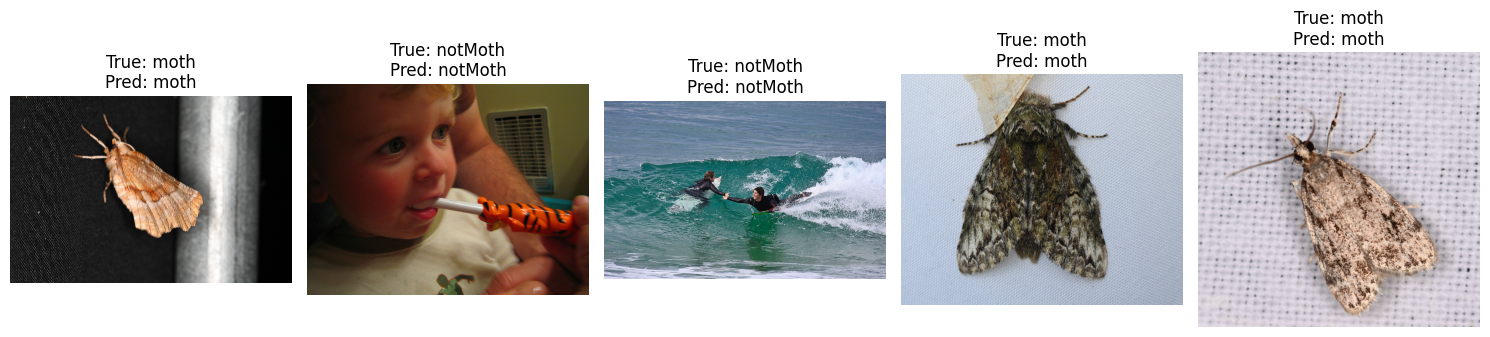

In [ ]:
import matplotlib.pyplot as plt
import random

# Randomly select images to display
num_images_to_display = 5
indices = random.sample(range(len(test_filenames)), num_images_to_display)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    # Load the image
    img_path = os.path.join(test_generator.directory, test_filenames[idx])
    img = plt.imread(img_path)

    # Get the true and predicted labels
    true_label = class_labels[true_classes[idx]]
    predicted_label = class_labels[predicted_classes[idx]]

    # Plot the image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()
